## Import relevant Python packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Import data

In [4]:
# import Lower Granite data
lower_granite_outflow = pd.read_csv('LowerGranitedailyoutflow.csv')
lower_granite_storage = pd.read_csv('lowergranitestorage.csv')
lower_granite_data = lower_granite_outflow.merge(lower_granite_storage, how='inner', on=['date'])
lower_granite_data['date'] = pd.to_datetime(lower_granite_data['date'])

# import Little Goose data
little_goose_outflow = pd.read_csv('littlegooseoutflow.csv')
little_goose_storage = pd.read_csv('littlegoosestorage.csv')
little_goose_data = little_goose_outflow.merge(little_goose_storage, how='inner', on=['date'])
little_goose_data['date'] = pd.to_datetime(little_goose_data['date'])

# import Lower Monumental data
lower_monumental_outflow = pd.read_csv('lowermonumentaloutflow.csv')
lower_monumental_storage = pd.read_csv('lowermonumentalstorage.csv')
lower_monumental_data = lower_monumental_outflow.merge(lower_monumental_storage, how='inner', on=['date'])
lower_monumental_data['date'] = pd.to_datetime(lower_monumental_data['date'])

# import Ice Harbor data
ice_harbor_outflow = pd.read_csv('iceharboroutflow.csv')
ice_harbor_storage = pd.read_csv('iceharborstorage.csv')
ice_harbor_data = ice_harbor_outflow.merge(ice_harbor_storage, how='inner', on=['date'])
ice_harbor_data['date'] = pd.to_datetime(ice_harbor_data['date'])

display(lower_granite_data)

,date,H (unit:cfs),S (unit:cfs)
0,1928-07-01,63918,0
1,1928-07-02,57164,0
2,1928-07-03,52531,0
3,1928-07-04,49500,0
4,1928-07-05,47309,0
...,...,...,...
32959,2018-09-26,23090,-1363
32960,2018-09-27,19443,1275
32961,2018-09-28,22972,-2374
32962,2018-09-29,17289,2989


<Axes: xlabel='date', ylabel='H (unit:cfs)'>

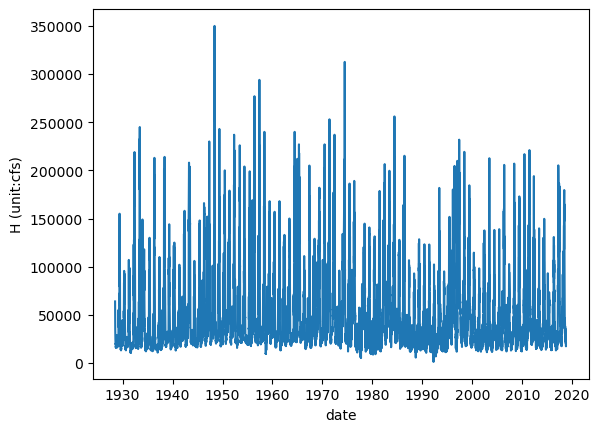

In [15]:
sns.lineplot(x='date', y='H (unit:cfs)', data=lower_granite_data)

{'whiskers': [<matplotlib.lines.Line2D at 0x1681ae510>,
 'caps': [<matplotlib.lines.Line2D at 0x1681aeae0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1681ae1b0>,
 'medians': [<matplotlib.lines.Line2D at 0x1681aeff0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1681af290>,
 'means': []}

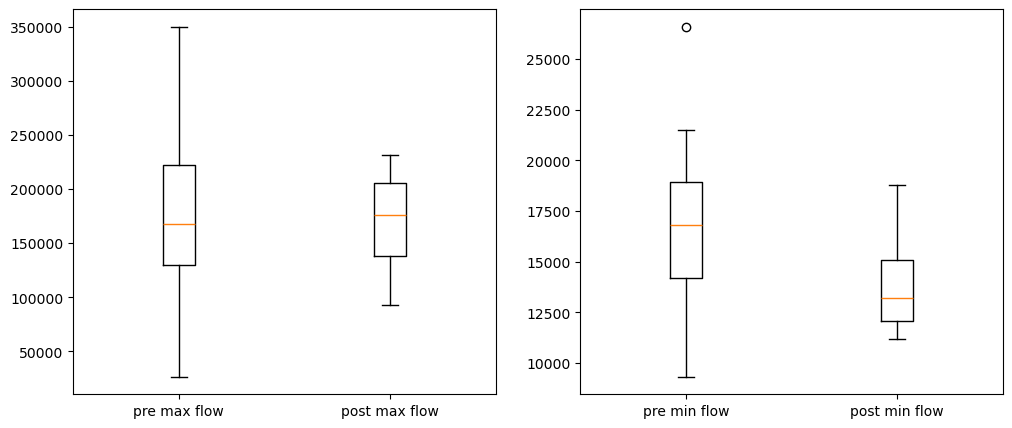

In [36]:
pre_cutoff = datetime(1970,1,1)
lower_granite_pre = lower_granite_data[lower_granite_data['date'] <= pre_cutoff]
lower_granite_pre_max = lower_granite_pre.groupby(lower_granite_pre['date'].dt.year)['H (unit:cfs)'].max()
lower_granite_pre_min = lower_granite_pre.groupby(lower_granite_pre['date'].dt.year)['H (unit:cfs)'].min()

post_cutoff = datetime(1993,1,1)
lower_granite_post = lower_granite_data[lower_granite_data['date'] >= post_cutoff]
lower_granite_post_max = lower_granite_post.groupby(lower_granite_post['date'].dt.year)['H (unit:cfs)'].max()
lower_granite_post_min = lower_granite_post.groupby(lower_granite_post['date'].dt.year)['H (unit:cfs)'].min()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.boxplot([lower_granite_pre_max, lower_granite_post_max], tick_labels=['pre max flow', 'post max flow'])

plt.subplot(1,2,2)
plt.boxplot([lower_granite_pre_min, lower_granite_post_min], tick_labels=['pre min flow', 'post min flow'])

## Initialize reservoirs

In [5]:
from newReservoir import Reservoir

ice_harbor = Reservoir(SA=9200*4047,num_turb=6,capacity=603000,tail_elev=339,pool_elev=446,bottom_elev=310,fish_pass=0.965, area=550_000_000, pc=106_000)
lower_monumental = Reservoir(SA=6590*4047,num_turb=6,capacity=810000,tail_elev=439,pool_elev=548.3,bottom_elev=406,fish_pass=0.965, area=1_610_000_000, pc=130_000)
little_goose = Reservoir(SA=10025*4047,num_turb=6,capacity=903000,tail_elev=539,pool_elev=646.5,bottom_elev=500,fish_pass=0.9775, area=1_175_000_000, pc=130_000)
lower_granite = Reservoir(SA=8900*4047,num_turb=6,capacity=810000,tail_elev=636,pool_elev=746.5,bottom_elev=590,fish_pass=1, area=2_477_000_000, pc=130_000)

## Simulate reservoirs

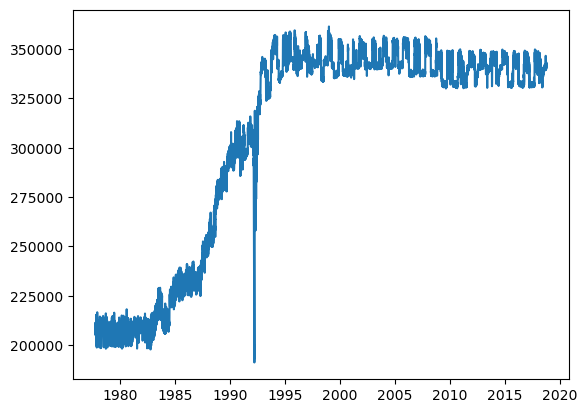

In [11]:
lower_granite_storage = lower_granite.simulate_storage(0, 1, lower_granite_data['S (unit:cfs)'], lower_granite_data['H (unit:cfs)'])

plt.plot(lower_granite_data['date'][18000:], lower_granite_storage[18000:])

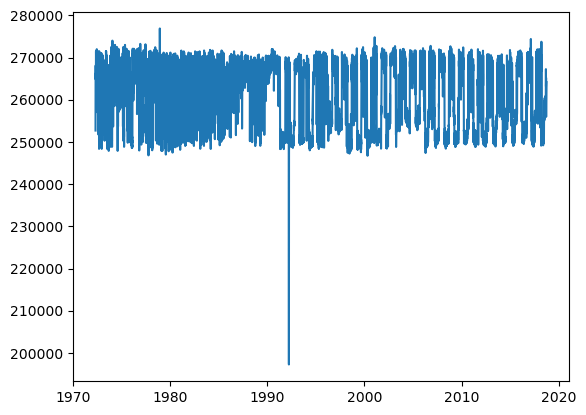

In [12]:
little_goose_storage = little_goose.simulate_storage(0, 1, little_goose_data['S (unit:cfs)'], little_goose_data['H (unit:cfs)'])

plt.plot(little_goose_data['date'][16000:], little_goose_storage[16000:])

In [ ]:
little_goose_storage = little_goose.simulate_storage(0, 1, little_goose_data['S (unit:cfs)'], little_goose_data['H (unit:cfs)'])

plt.plot(little_goose_data['date'][16000:], little_goose_storage[16000:])